<a href="https://colab.research.google.com/github/BRIJNANDA1979/BIGEARTHNET/blob/main/Geotif_tiles_using_Gdal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
source = '/content/drive/MyDrive/Planet Test tiff images/mississippi-usa/Mississippi USA/20181029_163434_ssc3d1_0009/20181029_163434_ssc3d1_0009_visual.tif'

In [ ]:
from osgeo import gdal

In [ ]:
dem=gdal.Open(source)

In [ ]:
gt=dem.GetGeoTransform()
gt

(280248.0, 0.8, 0.0, 3578461.6, 0.0, -0.8)

In [ ]:
xmin=gt[0]
ymax=gt[3]
res = gt[1]

In [ ]:
xlen = res * dem.RasterXSize
ylen = res * dem.RasterYSize

In [ ]:
div = 3   # 3*3 =9 square tiles or use different divisions factor for x and y for rectangular tiles
xsize =  xlen /div
ysize = ylen / div
xsteps = [xmin + i * xsize for i in range(div+1)]
ysteps=[ymax + i * ysize for i in range(div+1)]

In [ ]:
for i in range(div):
               for j in range(div):
                 xmin = xsteps[i]
                 xmax=xsteps[i+1]
                 ymin=ysteps[j]
                 ymax=ysteps[j+1]
                 gdal.Warp('/content/drive/MyDrive/'+"dem"+str(i)+str(j)+'.tif',dem,xRes=res,yRes=-res,outputBounds=(xmin,ymin,xmax,ymax),dstNodata=-9999) #or Gdl.Translate

In [ ]:
! gdalinfo '/content/drive/MyDrive/dem00.tif'

Driver: GTiff/GeoTIFF
Files: /content/drive/MyDrive/dem00.tif
Size is 1030, 504
Coordinate System is:
PROJCS["WGS 84 / UTM zone 16N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-87],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32616"]]
Origin = (280248.000000000000000,3578864.533333333209157)
Pixel Size = (0.800000000000000,-0.800000000000000)
Metadata:
  AREA_OR_

In [ ]:
!pip install rasterio

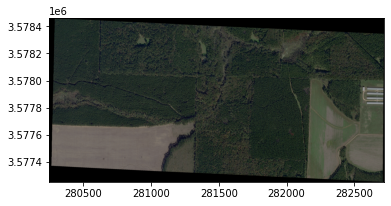

In [ ]:
import rasterio
from rasterio.plot import show
fp1 = r'/content/drive/MyDrive/Planet Test tiff images/mississippi-usa/Mississippi USA/20181029_163434_ssc3d1_0009/20181029_163434_ssc3d1_0009_visual.tif'
img = rasterio.open(fp1)
show(img)

In [ ]:
!pip install georaster

  Created wheel for georaster: filename=georaster-1.25-cp37-none-any.whl size=15113 sha256=0caef13039e957f6c2582a649da7e55a26373a771bb86abb1feaf18b6dbdb787
  Stored in directory: /root/.cache/pip/wheels/ce/83/9d/39f797a5014ff9a3be863384c39ee85659b62685c5c624b032
Successfully built georaster


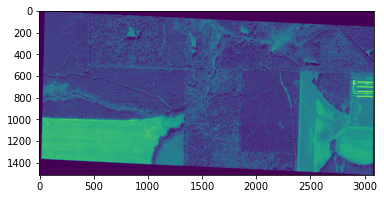

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open(fp1, gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

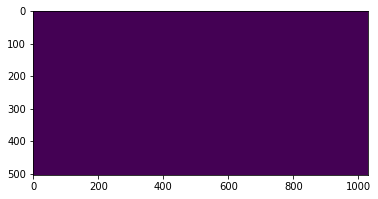

In [ ]:

fp = r'/content/drive/MyDrive/dem11.tif'
dataset = gdal.Open(fp, gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [ ]:
gdal.Warp('/content/drive/MyDrive/'+"test"+str(i)+str(j)+'.tif',dem,xRes=res,yRes=-res,outputBounds=(xmin,ymax-ylen,xmin+xlen,ymax),dstNodata=-9999) #or Gdl.Translate

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f7fe701bed0> >

In [ ]:
from osgeo import gdal

ds = gdal.Open(source)
ds=gdal.Translate('/content/drive/MyDrive/test.tif', ds, projWin = [xmin,ymax-ylen,xmin+xlen,ymax])
ds=None

In [ ]:
#https://geohackweek.github.io/raster/04-workingwithrasters/
print('Landsat on Google:')
filepath = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
with rasterio.open(filepath) as src:
    print(src.profile)

Landsat on Google:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7821, 'height': 7951, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(30.0, 0.0, 204285.0,
       0.0, -30.0, 4268115.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


In [ ]:
print('Landsat on AWS:')
filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
with rasterio.open(filepath) as src:
    print(src.profile)

Landsat on AWS:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7821, 'height': 7951, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(30.0, 0.0, 204285.0,
       0.0, -30.0, 4268115.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


[3, 9, 27, 81]
Decimation factor= 3
array type:  <class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Text(0, 0.5, 'Row #')

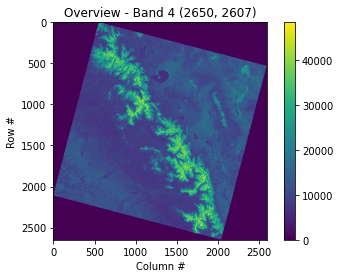

In [ ]:
# The grid of raster values can be accessed as a numpy array and plotted:
with rasterio.open(filepath) as src:
   oviews = src.overviews(1) # list of overviews from biggest to smallest
   print(oviews)
   oview = oviews[0] # let's look at the smallest thumbnail
   print('Decimation factor= {}'.format(oview))
   # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
   thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

print('array type: ',type(thumbnail))
print(thumbnail)

plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
src.height // oview

98

Text(0, 0.5, 'Row #')

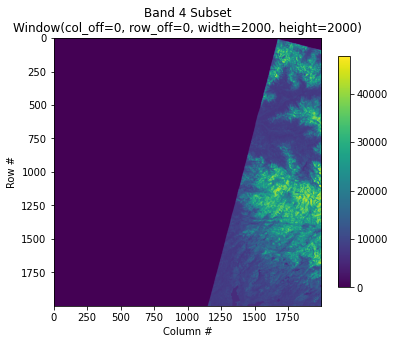

In [ ]:
#https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html
#rasterio.windows.Window(col_off, row_off, width, height)
window = rasterio.windows.Window(0,0,2000,2000)

with rasterio.open(filepath) as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
import numpy as np
data_array =  np.array(subset)
print(data_array.shape)

(2000, 2000)


In [ ]:
# Use the same example image:
date = '2017-06-16'
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
redband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(4)
nirband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(5)

Decimation factor= 9


Text(0, 0.5, 'Row #')

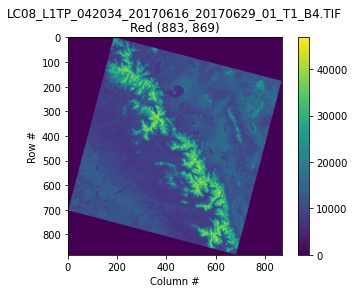

In [ ]:
with rasterio.open(url+redband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(red)
plt.colorbar()
plt.title('{}\nRed {}'.format(redband, red.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')